# Linear Regression 

## Case study : A Prominent  Medical aid scheme in South Africa 

![alt text][image]

[image]: https://cdn.pixabay.com/photo/2022/03/13/01/33/insurance-7065113_1280.png "Title text"


# Table of Contents
1. [Evaluate the dataset](#Evaluate-the-dataset)    
2. [Exploratory Data Analysis](#chapter2)
3. [Feature selection](#Feature-selection)
4. [Train model](#Train-model)
5. [Evaluate model](#Evaluate-model)
6. [Retrain model](#Retrain-model)
7. [Bonus](#Bonus)

# Evaluate the dataset 

## *Is linear regression a suitable algorithm for this dataset ?*

In this section, we are going to examine the dataset of a prominant medical aid scheme in South Africa that was provided to us. The goal is to see if the dataset  is suitable for using the Linear Regression Algorithm to tailor their medical aid cost according to the lifestyles and geographic regions of their customers 

## Importing Libraries

We start this analysis by importing the relevant libraries that will be useful for evaluating the dataset, visualisation, processing, and training the linear regression model 

In [415]:
import numpy as np # Numerical operations 
import pandas as pd # Data manpulatioin
import matplotlib.pyplot as plt # Data visualisaion 
import seaborn as sns # Advanced visualisations
import plotly.express as px # High-level API for creating figures
%matplotlib inline 
import warnings # Set plots to appear under the code cell 
warnings.filterwarnings('ignore') # Ignore warnings messages for cleaning output 
import statsmodels.api as sm # provides classes and functions for statistical summaries 
from sklearn.model_selection import train_test_split, GridSearchCV # For splitting data and hyperparameter tuning
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV ,Lasso, ElasticNet, ElasticNetCV # Regression  models
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error # Evaluation metrics
from sklearn.tree import DecisionTreeRegressor # Decision Tree Regressor 
from sklearn.ensemble import RandomForestRegressor # Random Forest Regressor 

## Loading the dataset

Let's now look at the dataset to have an overview of its content 

In [426]:
# Load data and display the first ten rows
df = pd.read_csv('insurance.csv')
df.head(20)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,"16,884.924"
1,18,male,33.770,1,no,southeast,"1,725.552"
2,28,male,33.000,3,no,southeast,"4,449.462"
3,33,male,22.705,0,no,northwest,"21,984.471"
4,32,male,28.880,0,no,northwest,"3,866.855"
5,31,female,25.740,0,no,southeast,"3,756.622"
6,46,female,33.440,1,no,southeast,"8,240.590"
7,37,female,27.740,3,no,northwest,"7,281.506"
8,37,male,29.830,2,no,northeast,"6,406.411"
9,60,female,25.840,0,no,northwest,"28,923.137"


When we take a look at the dataset, we can see that the target variable, “charges”, contains continuous values. This is a good sign because linear regression works best when predicting continuous outcomes, which is exactly what we want with the “charges” variable. So, right off the bat, this seems like it could be a good fit for linear regression.

But of course, just seeing the continuous values isn’t enough to say for sure that linear regression will work. We need to dive a bit deeper and look at how the features relate to the target variable, “charges”, to get a better sense of whether this is a good choice.

1. Age and Charges:

   * here seems to be a linear relationship between age and charges. Younger patients tend to have lower charges, while older patients seem to have higher charges. It looks like there is some sort of trend here that could work for linear regression.
    
2. Sex and Charges:

   * When we look at sex, males seem to have higher varation in charges  compared to females. This suggests there could be a linear relationship, but it is something we would need to check further to be sure.
     
3. BMI and Charges:

   * With BMI, there seems to be a slight linear relationship, but it is  not very strong. Patients with lower BMI appear to have somewhat lower charges, but it’s not a evident, so this feature might not be the best predictor on its own.
  
4. Children and Charges:

   * The number of children seems to have a positive linear relationship with charges. More children usually means higher charges, so this could be another solid feature for linear regression.
5. Smoking and Charges:

   * mokers seem to have higher charges than non-smokers, which is a pretty strong indication of a linear relationship. This is definitely a feature that could work well in a linear regression model.
6. Region and Charges:

    * When we look at the region, the relationship with charges is not as obvious. While the Southeast region shows some signs of a possible linear relationship, there is  not enough clear evidence to say  region will work well for linear regression.

**Conclusion:**

So, after looking through everything, we would  say that this dataset seems pretty suitable for linear regression. Several features show potential linear relationships with the target variable, “charges”, which is exactly what we need. However , we will  need to go deeper with some statistical tests, visualisaion  and  model fitting to confirm these relationships, but it is  a good starting point.

## Interpreting the content of the dataset

Here we are going to interpret the contents of the dataset to gain a better understanding of its structure

###  Dimension

 Let's get the dimension of the datset. In simple terms, the dimension refers to the number of rows and columns in the dataset

In [436]:
# Show the dimensions of the dataset
df.shape

(1338, 7)

###  Information

Here we get a summary of the dataset, including the number of rows, columns, the name of columns , the number of non null values , the types of columns and the memory usage 

In [440]:
# Show information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


###  Summary

Here we get a statistical summary of the numerical columns (age, bmi, children, charges)  in  the dataset, including some statistical metrics as shown below 

In [446]:
# Show summary statistics only for numeric columns
df.describe()

,age,bmi,children,charges
count,"1,338.000","1,338.000","1,338.000","1,338.000"
mean,39.207,30.663,1.095,"13,270.422"
std,14.050,6.098,1.205,"12,110.011"
min,18.000,15.960,0.000,"1,121.874"
25%,27.000,26.296,0.000,"4,740.287"
50%,39.000,30.400,1.000,"9,382.033"
75%,51.000,34.694,2.000,"16,639.913"
max,64.000,53.130,5.000,"63,770.428"


## Cleaning data

###  Missing values

Let's check if the dataset contains missing values

In [450]:
# Count the missing values in the dataset
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

###  Duplicates

Let's check if the dataset contains duplicate values

In [454]:
# Count the duplicated row
df.duplicated().sum()

1

We found one duplicate entry. Now, we are going to display the duplicated value along with its occurrence

In [459]:
# Show a duplicated row along with its occurrence 
df[df.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.590,0,no,northwest,"1,639.563"
581,19,male,30.590,0,no,northwest,"1,639.563"


We check to make sure 

In [461]:
# Check the original occurrence row 
df.iloc[195]

age                19
sex              male
bmi            30.590
children            0
smoker             no
region      northwest
charges     1,639.563
Name: 195, dtype: object

In [463]:
# Check the duplicated row 
df.iloc[581]

age                19
sex              male
bmi            30.590
children            0
smoker             no
region      northwest
charges     1,639.563
Name: 581, dtype: object

After being sure that there is a duplicate value, we are going to remove it 

In [467]:
# Remove duplicates
df_cleaned = df.drop_duplicates(keep='first')

Then we display the new dimensions of the dataset, and we notice that the number of rows has decreased.

In [470]:
# Show the dimensions of the new dataset
df_cleaned.shape

(1337, 7)

# Exploratory Data Analysis

In this section, we are going to explore patterns, trends and relationships between features and the target variable 
we  will proceed  in 3 steps :
* Univariate analysis
* Bivariate analysis
* Mutivariate analysis

## Univariate analysis

We are going to perfom univariate analysis witch involves exploring  one variable at a time to understand its effect within the  dataset 

### AGE

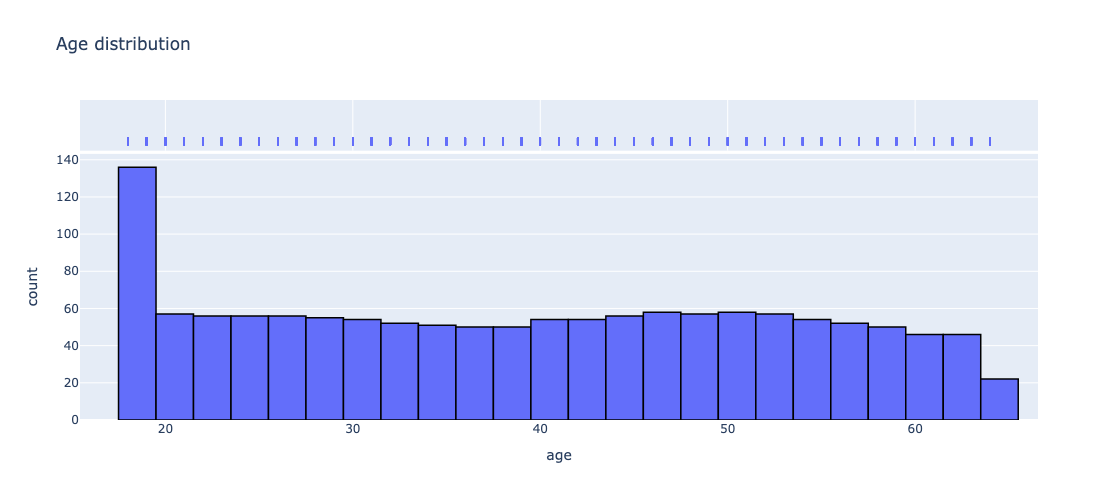

In [477]:
# Age distribution 
x=df_cleaned['age'] # extract 'age' column
title="Age distribution" # the title of the figure
fig = px.histogram(df_cleaned, x=x, marginal="rug",title=title) # create histogram
fig.update_layout(width=1000,height = 500) # set size
fig.update_traces(marker_line_color='black', marker_line_width=1.5) # add black border
fig.show() # display the figure 

We can see that most patients in the dataset are between 18 and 19 years old (136 people), with 22 patients between 64 and 65 years old.

### BMI

In [481]:
# Define a function to categorize BMI values
def category_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

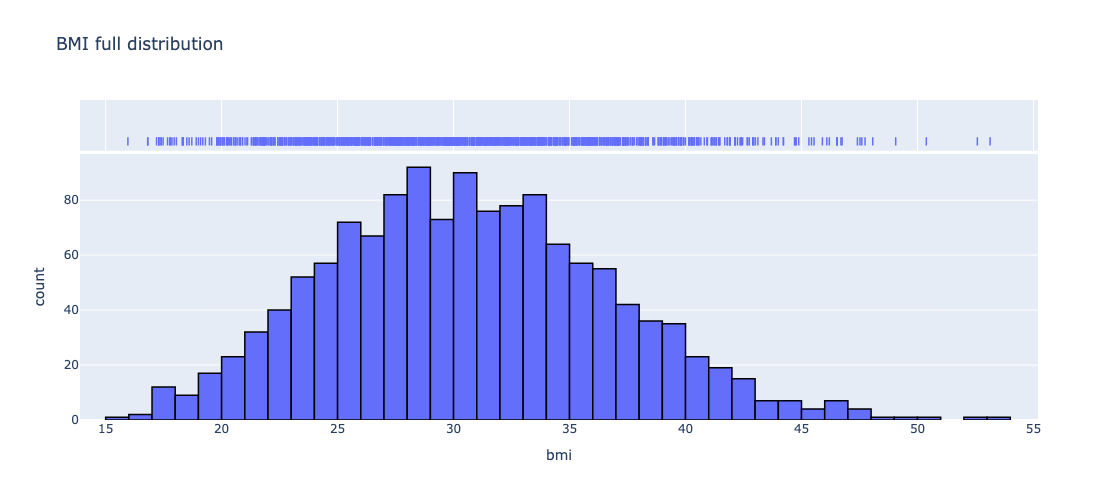

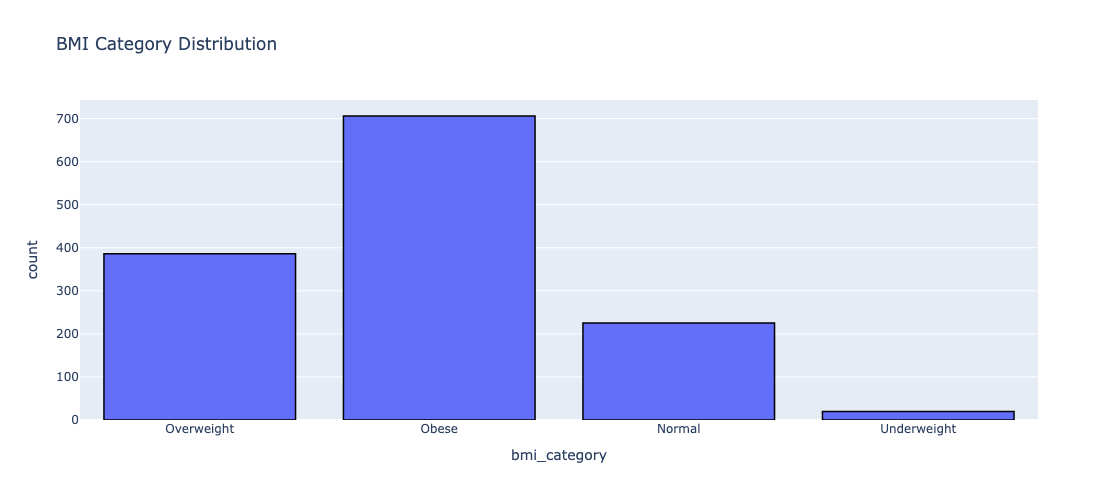

In [483]:
# bmi full distribution 
x=df_cleaned['bmi'] # extract 'bmi' column 
title="BMI full distribution" # the title of the figure
fig = px.histogram(df_cleaned, x=x, marginal="rug",title=title) # create histogram
fig.update_layout(width=1000,height = 500) # set size
fig.update_traces(marker_line_color='black', marker_line_width=1.5) # add black border
fig.show() # display the figure

df_bmi = df_cleaned.copy() # create a copy of the cleaned dataset 
df_bmi['bmi_category'] = df_bmi['bmi'].apply(category_bmi) # call the 'category_bmi' function and create a new column with BMI categories 
title = "BMI Category Distribution" # the title of the figure
fig = px.histogram(df_bmi, x='bmi_category', title=title) # create histogram
fig.update_layout(width=800, height=500) # set size
fig.update_traces(marker_line_color='black', marker_line_width=1.5) # display the figure
fig.show() # display the figure


We can see that most patients in the dataset are Obese, and fewer are underweight

### CHILDREN 

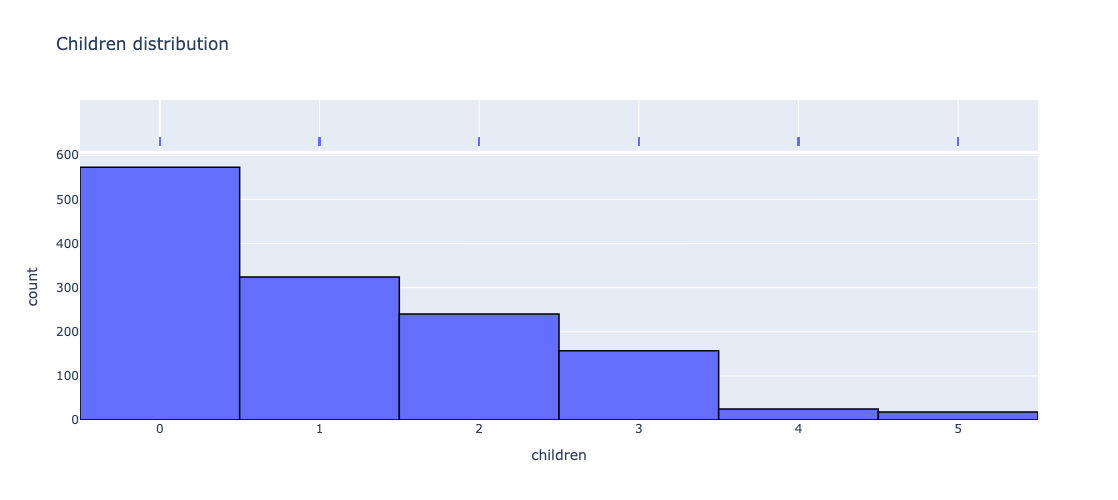

In [487]:
# children distribution
x=df_cleaned['children'] # extract 'children' column 
title = "Children distribution" #  the title of figure
fig = px.histogram(df_cleaned, x=x, marginal="rug",title=title) # create histogram
fig.update_layout(width=1000,height = 500) # set size
fig.update_traces(marker_line_color='black', marker_line_width=1.5) # add black border
fig.show() # display the figure

This distribution tells us that most patients in the dataset do not have any children (573 people), and  few have more  children (18 people) 

### SEX

sex
male      675
female    662
Name: count, dtype: int64


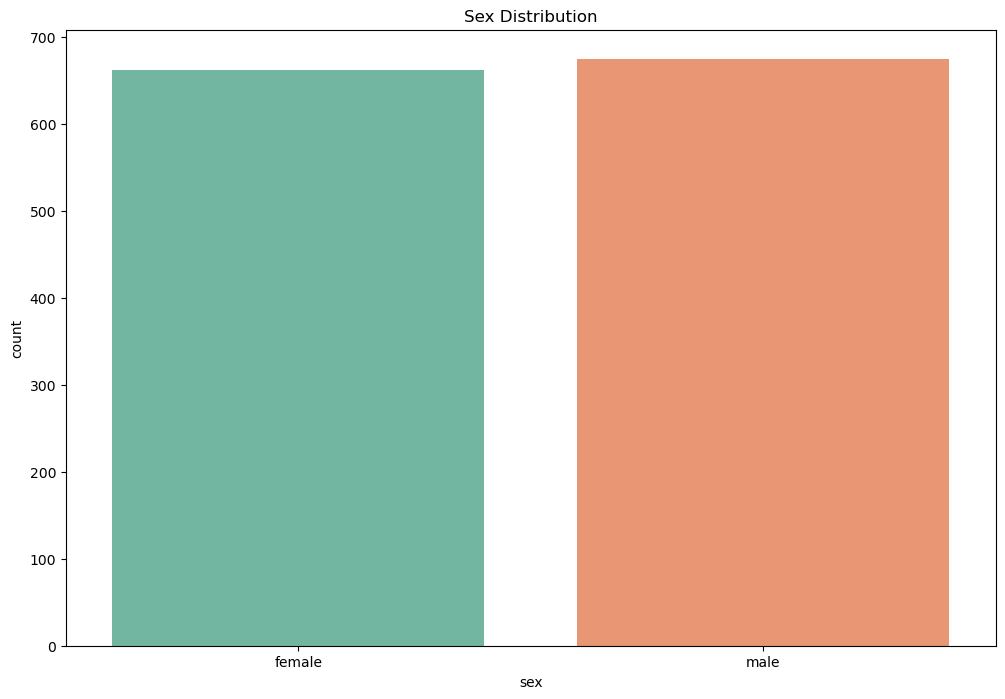

In [491]:
# Sex distribution 
x = df_cleaned['sex'] # extract 'sex' column 
number = x.value_counts() # count males and females
print(number) # print the number of males and females 
palette = "Set2" # set palette (color)
plt.figure(figsize=(12, 8)) # set size 
sns.countplot(x=x, data=df_cleaned,palette=palette) # plot count for 'sex' column 
plt.title('Sex Distribution') # title of  the count plot 
plt.show() # display the count plot 

We can see that the number of males and females in the data is quite balanced, but malesare more than females 

### SMOKER 

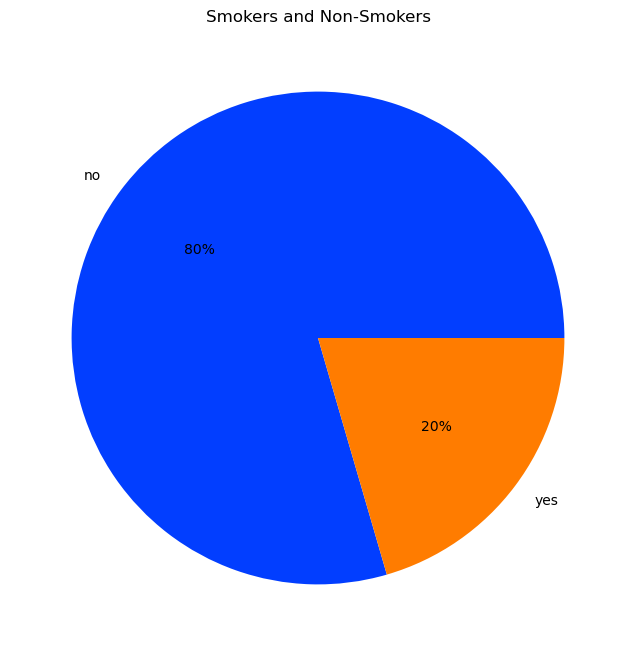

In [496]:
# smoker distribution 
smoker_col = df_cleaned['smoker'] # extract the 'smoker' column 
smoker_col_cat_counts = smoker_col.value_counts() # get the count of each category in 'smoker' column
labels = smoker_col_cat_counts.index # set the index to ensure that labels match the order of the counts 
palette_color = sns.color_palette('bright') # set a color 
plt.figure(figsize=(12, 8)) # set size 
plt.pie(smoker_col_cat_counts, labels=labels, colors=palette_color,autopct='%.0f%%') # create a pie chart of smoker
plt.title('Smokers and Non-Smokers') # title of the pie chart 
plt.show() # display the pie chart 

We can see that 80% of patients are not smokers, while 20% are smokers

### REGION

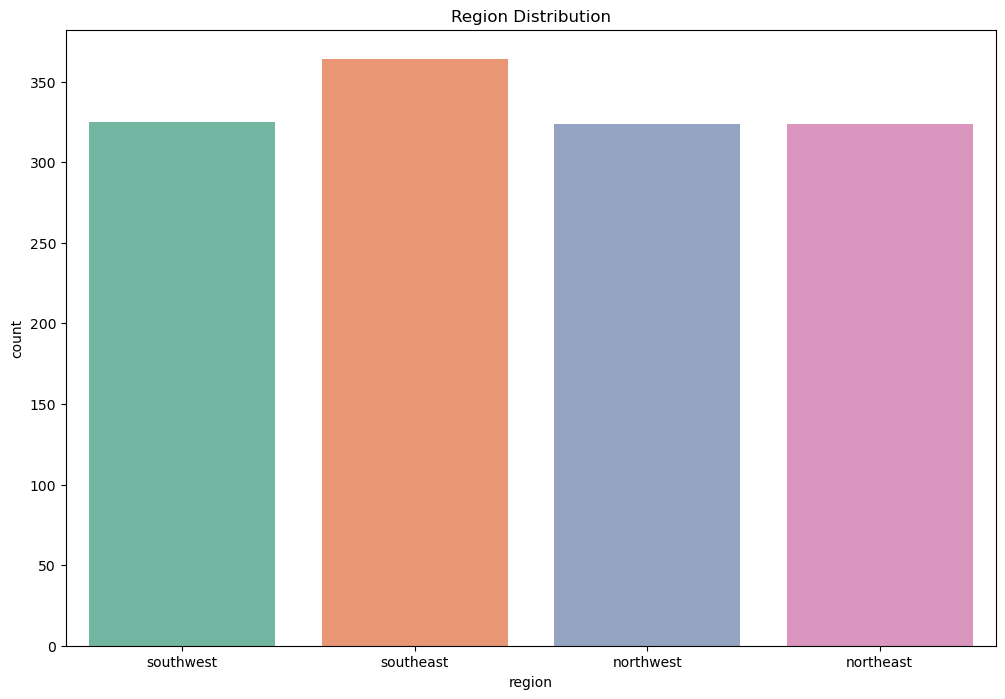

In [502]:
# smoker distribution 
x = df_cleaned['region'] # extract 'region' column 
palette = "Set2" # set palette (color)
plt.figure(figsize=(12, 8)) # set size 
sns.countplot(x=x, data=df_cleaned,palette=palette) # plot count for 'region' column 
plt.title('Region Distribution') # title of  the count plot 
plt.show() # display the count plot 

Here we can see that the  number of patients from the northeast is slightly higher than in other regions, but the counts from the other regions are nearly equal. 

### CHARGES 

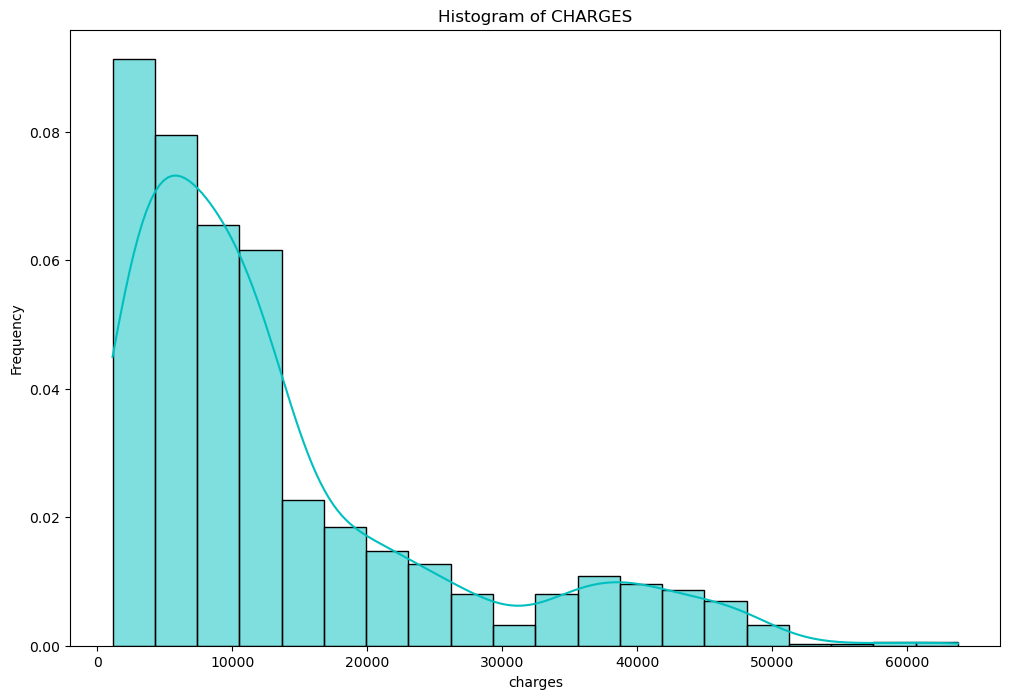

In [506]:
# Plot the 'charges' column
x=df_cleaned['charges'] # extract 'charges' column 
bins = 20 # set the number of bins
stat = 'frequency' # set frequency
kde=True # show the KDE curve
color='c' # set color
plt.figure(figsize=(12, 8)) # set size 
sns.histplot(data=df_cleaned, x=x, bins=bins,stat=stat,kde=kde,color=color) # Plot histogram
plt.title("Histogram of CHARGES") # title of the histogram
plt.show() # display histogram 

We can see that most  medical expenses are below 10,000, and only a small number of patients have expenses exceeding 50,000.

**This is the target variable. We can observe that the distribution is skewed to the right.**


**For now, we will leave it as it is and come back to it later to better understand what this skewness means and how leave it like or nomralise can affect the model .**

## Bivariate analysis

We will perform the analysis of two variables to determine the relationships between them, which is a bivariate analysis.

We analyze each feature in relation to the target variable, using smoker as a color

### Age, BMI vs. Charges

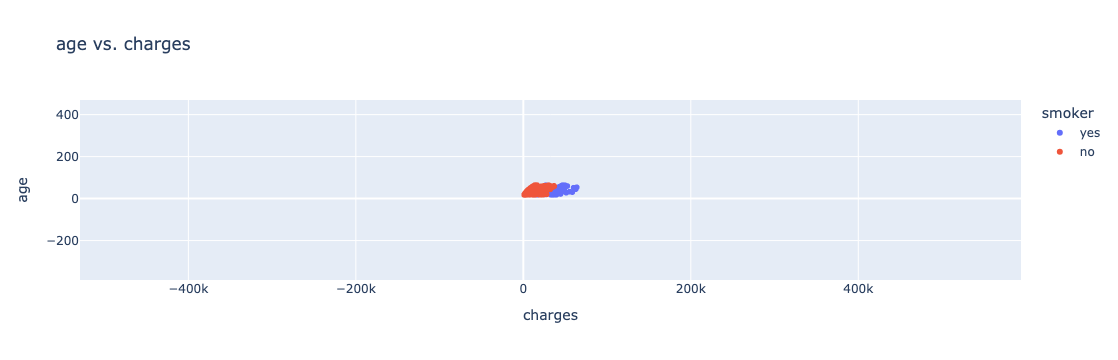

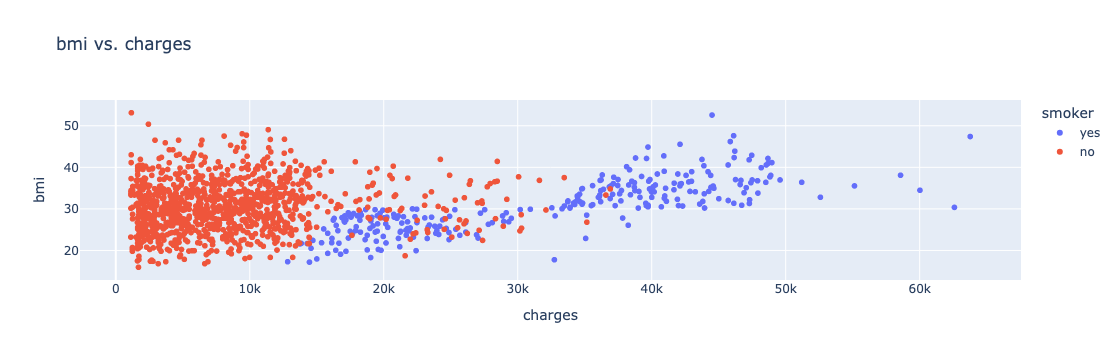

In [515]:
# age, bmi vs, charges distributions
x = df_cleaned['charges'] # extract the 'charges' column 
color = df_cleaned['smoker'] # extract the 'smoker' column for the color 
df_columns = ['age','bmi']
for col in df_columns:
    fig = px.scatter(df_cleaned, x=x, y=col,color=color, title=f"{col} vs. charges")
    fig.show()


**age vs. charges**

The first distribution shows that there is some moderate positive relationship between age and  charges, we can see that as age increases the charges also tend to increase. However, this relationship is not linear. We observed that some younger patients have higher charges due to other influencing factors, such as smoking status in this case (though not only this one; we will explore others later).
**bmi vs. charges**

The second distribution shows that there is not a strong relationship between bmi and  charges.


### Children vs. Charges

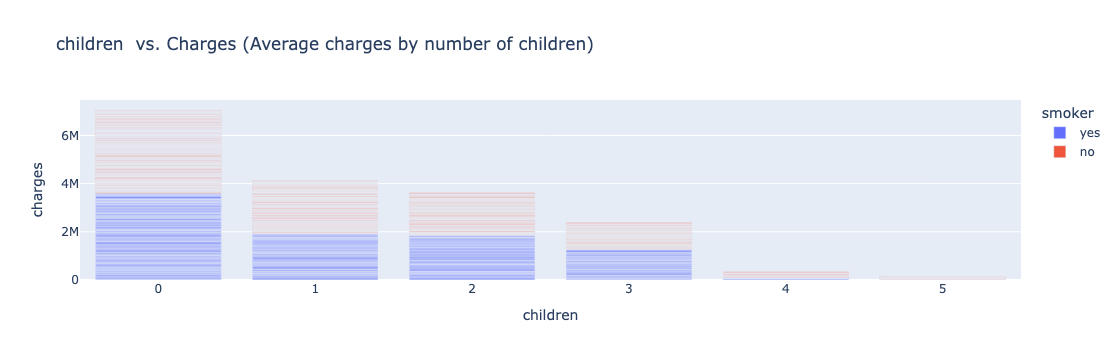

In [519]:
# children vs. charges distribution 
grouped_df = df_cleaned.groupby('children')['charges'].mean() # group the dataset by 'children' and  calculate the average value of charges for each group
x = df_cleaned['children'] # extract the 'children' column 
y = df_cleaned['charges'] # extract the 'charges' column
color = df_cleaned['smoker'] # extract the 'smoker' column for the color 
title = "children  vs. Charges (Average charges by number of children)" # title of the figure
fig = px.bar(df_cleaned, x=x, y=y,color=color, title=title) # create the bar plot 
fig.show() # display the figure 



Here, we can see that pPatients with fewer children tend to have higher charges compared to those with more children. However, we should not hastily conclude that there is a strong correlation.

### Sex, Smoker, Region vs. Charges

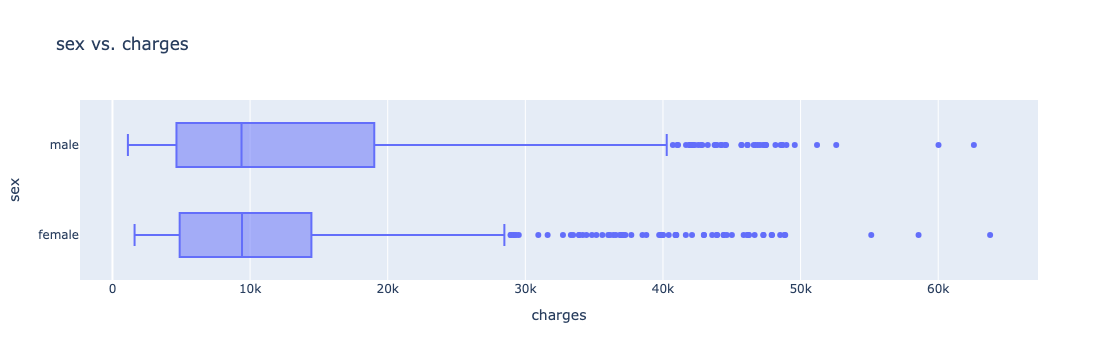

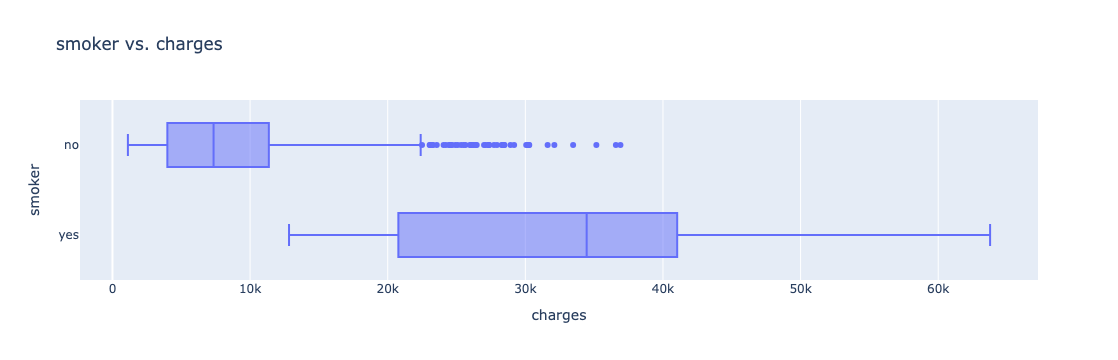

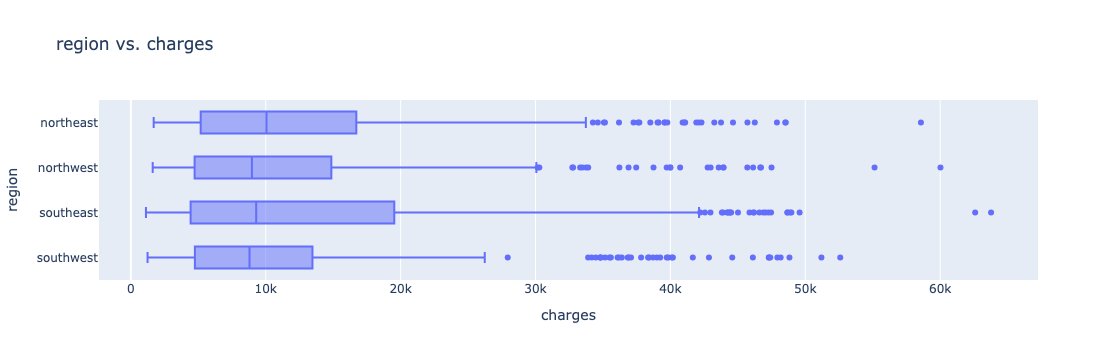

In [523]:
# sex, smoker, region vs. charges distribution
x = df_cleaned['charges'] # extract the 'charges' column 
df_columns = ['sex','smoker','region'] # create a list of 3 columns: 'sex' and 'smoker' and 'region'
for col in df_columns: # loop through  evrey col in df_columns 
    fig = px.box(df_cleaned, x=x, y=col, title=f"{col} vs. charges") #create a box for each column
    fig.show() # display figures 


**sex vs. charges**

We see here that, on average, females have higher charges than males. However, males tend to have a greater variability than females due to the wider box reflecting a range of lower to higher changes. This is not definitive as the result might be infulenced by others factors . 

**smoker vs. charges**

We notice that here smokers tend to have more charges than non-smokers, the average and the variability of smokers are higher. This allows us to say there is a strong relationship between smokers and charges.

**region vs. charges**

We can see that the Southeast region tends to have a stronger relationship with charges compared to the other regions

**We also notice outliers in charges , we will leave like this for now**



## Mutlivariate analysis

We are going to examine the interactions and relationships among three or more variables through multivariate analysis.

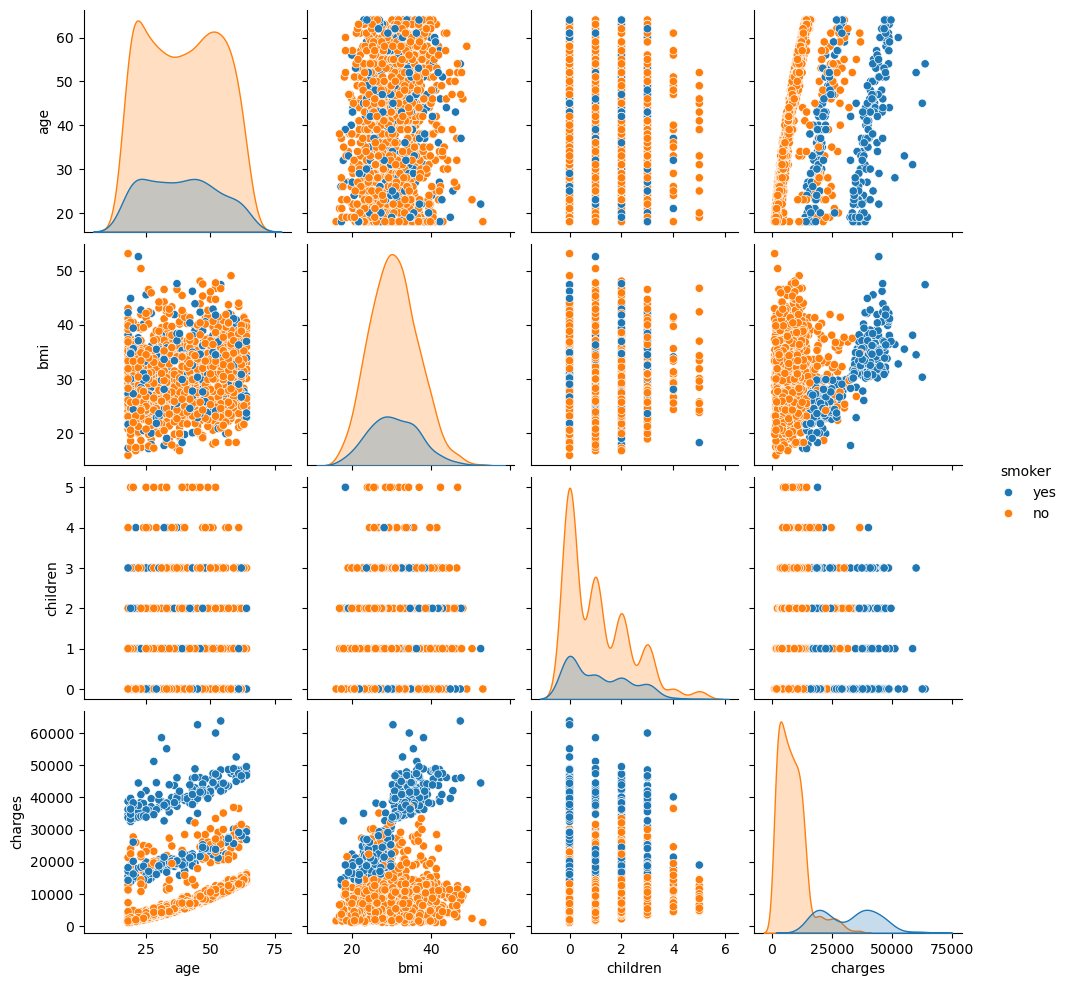

In [528]:
# plot  pairwise relationships  
sns.pairplot(df_cleaned,hue="smoker") # create the pairplot with hue based on 'smoker' column 
plt.show() # display the plot

We see here the pairplot only for numeric variables: age, bmi, children, and charges, showing the relationship between them

**As discussed above, while doing bivariate analysis**

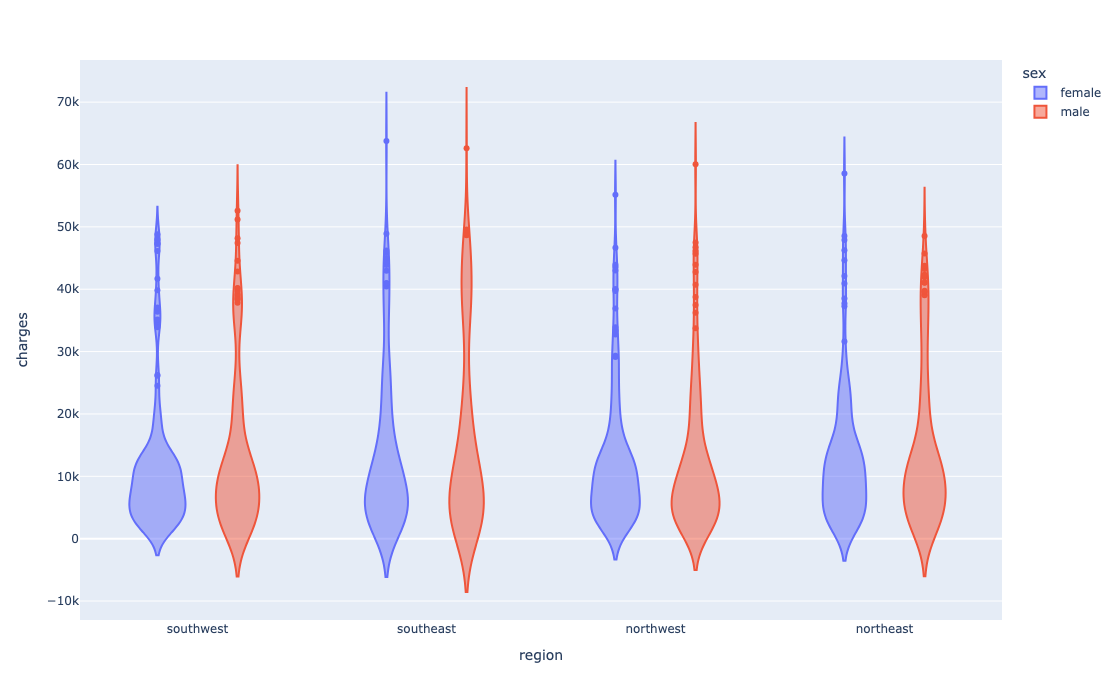

In [531]:
# Show the relationship between region, charges, and sex using a violin plot
fig = px.violin(df_cleaned, x="region",y="charges", color="sex") # create the violon plot 
fig.update_layout(width=1000, height=700) # set size
fig.show() # display the figure 

From this figure, it is clear that in the southeast region, more male patients tend to spend on charges than in other regions 

In [534]:
# Show the relationship between charges, age, children using 3D scatter plot
fig = px.scatter_3d(df_cleaned,x="charges",y="age",z="bmi",color="children", size="charges", title=" 3D scatter plot") # create the scatter_3d plot 
fig.update_layout(width=1000, height=700) # set_size
fig.show() #display the figure 

From this  3D scatterplot we  visualizes the relationship between  charges, age, BMI, and number of children. Charges tend to increase with age and BMI, especially for older patients with higher BMI. The color dimension, representing the number of children, shows that patients with more children are scattered across different charge levels but are more frequent among middle-aged. However, there doesn’t appear to be a strong pattern suggesting that the number of children alone significantly influences charges, as similar charge levels occur across different child counts. Instead, age and BMI remain the dominant factors influencing higher insurance costs, with the number of children adding some variation but not a definitive trend.

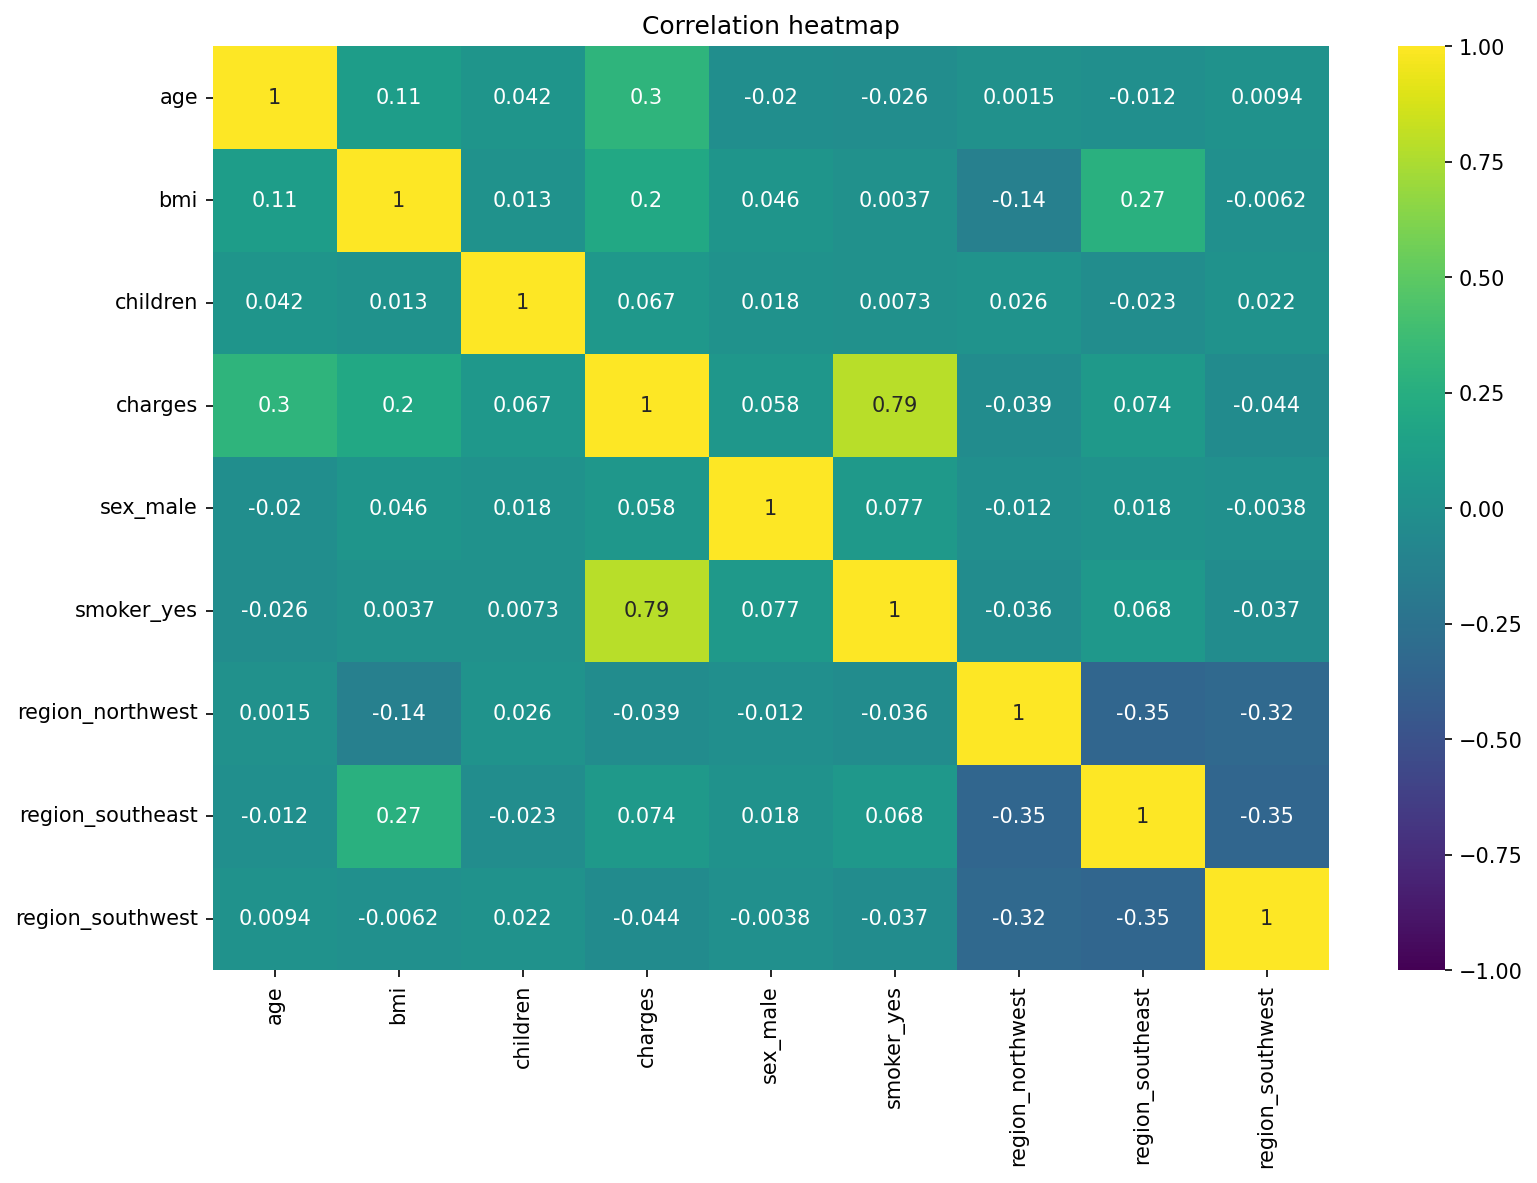

In [536]:
# Create and display the correlation heatmap
df_encoded = pd.get_dummies(df_cleaned, drop_first=True) # convert categorical features into numerical using one-hot encoding
plt.figure(figsize=(12,8),dpi=150) # set size
sns.heatmap(df_encoded.corr(),annot=True,cmap='viridis',vmin=-1,vmax=1) # create the correlation heatmap 
plt.title("Correlation heatmap")
plt.show() # display the correlation heatmap

**Before proceeding with the correlation matrix, we start by converting categorical features such as sex, smoker, and region.**

The figure above shows the relationship between each column in the dataset. However, we are going to stay focused on the relationship between features and the target variable, charges. We notice that there is a strong correlation between smoker and charges.

# Feature selection

Extracting the right features is essential for training a good model. In this section we are going to apply two feature selection methods that will help us identify which features are most useful for building an effective model.

The methods we use are:
* Correlation Matrix Heatmap:
This method in this case helps us identify how strongly each feature is linearly related to the target variable charges. Features with higher absolute correlation values are likely to be better predictors([daython3][1], 2023).

* Backward Elimination (via OLS process):
This technique is used to iteratively remove features with the highest p-values, which indicate weaker statistical significance ([Simplilearn][2], 2023).

*_Note: In this context, we are not focusing on building an OLS model itself, but rather using the OLS process as a tool to help eliminate features that are not statistically significant for predicting charges._*

[1]: https://medium.com/@daython3/mastering-the-art-of-feature-selection-python-techniques-for-visualizing-feature-importance-cacf406e6b71
[2]: https://www.simplilearn.com/what-is-backward-elimination-technique-in-machine-learning-article

## Correlation Matrix Heatmap

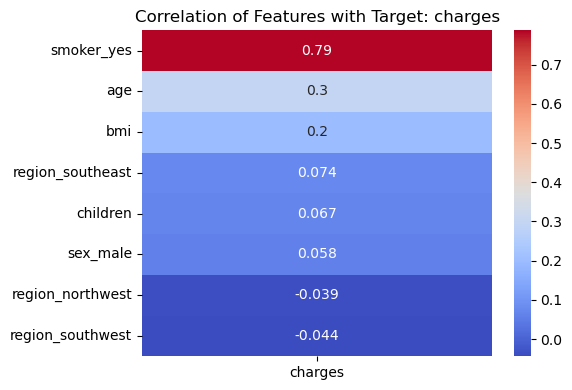

In [542]:
# get only the correlation of each feature with the target values 
corr_matrix = df_encoded.corr() # compute correlation matrix
target_corr = corr_matrix[['charges']].drop(index='charges') # correlation of each feature with 'charges' 
target_corr = target_corr.sort_values(by='charges', ascending=False) #  sort by correlation strength
plt.figure(figsize=(6, 4)) #set size
sns.heatmap(target_corr, annot=True, cmap='coolwarm', cbar=True) # Plot heatmap
plt.title('Correlation of Features with Target: charges') # title of the heatmap 
plt.tight_layout() # adjusts the layout
plt.show() # display the plot

We can see here how the features are correlated with the target, and the feature with the highest correlation is smoker 

Acoording to [daython3][1], a correlation matrix heatmap can be useful for identifying features that are most strongly correlated with the target variable. He also state that these features may be important for the model’s prediction, and visualising them can give us insights into how they influence the target variable.

Based on the results obtained, we can select the following features:
* smoker_yes
* age
* bmi

We may consider including region_southeast because dropping more features may lead to underfitting.  :
* region_southeast 


Note: This selection is not definitive. Our goal here is to compare the performance of the two feature selection methods used, in order to determine which one performs better in identifying the most relevant features.

[1]: https://medium.com/@daython3/mastering-the-art-of-feature-selection-python-techniques-for-visualizing-feature-importance-cacf406e6b71

## Backward Elimination (Throught  OLS process)

We start this method by  diplaying the first five row of the converted dataset to get an having an overview of its content 

In [547]:
# Display the first five rows of the data converted
df_encoded.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,"16,884.924",False,True,False,False,True
1,18,33.770,1,"1,725.552",True,False,False,True,False
2,28,33.000,3,"4,449.462",True,False,False,True,False
3,33,22.705,0,"21,984.471",True,False,True,False,False
4,32,28.880,0,"3,866.855",True,False,True,False,False


we print the types of each features using the mehtode dtypes

In [550]:
# Display the types of the data 
df_encoded.dtypes

age                   int64
bmi                 float64
children              int64
charges             float64
sex_male               bool
smoker_yes             bool
region_northwest       bool
region_southeast       bool
region_southwest       bool
dtype: object

We convert each feature that has the type bool to int and see how the dataset looks.

In [555]:
X = df_encoded.drop('charges', axis=1) # get all the features except the target 
y = df_encoded['charges'] # target variable 'charges'
# Loop through each column in the feature  and convert bool types to int
for col in X.columns:
    if X[col].dtype == bool:
        X[col] = X[col].astype(int)
X.head() # display the first five rows

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


We start the backward elimination process by adding a constant and fitting the model with all the features

In [558]:
X = sm.add_constant(X)  # Add intercept
model = sm.OLS(y, X).fit()# create and fit the model
print(model.summary()) # print a summary

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.0
Date:                Fri, 25 Apr 2025   Prob (F-statistic):               0.00
Time:                        13:33:33   Log-Likelihood:                -13538.
No. Observations:                1337   AIC:                         2.709e+04
Df Residuals:                    1328   BIC:                         2.714e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.194e+04    988.227  

We have all the features along with their coefficients and p-values. We will look at the ones with p-values higher than 0.05 and drop them, doing this process by dropping one feature at a time. 

We drop 'sex_male with p-value = 0.698

le's train the model again 

In [561]:
X1 = X.drop(['sex_male'], axis=1) # drop 'sexe_male' column
X1 = sm.add_constant(X1) # Add constant 
model1 = sm.OLS(y, X1).fit() # fit the model
print(model1.summary()) # print a summary

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     571.8
Date:                Fri, 25 Apr 2025   Prob (F-statistic):               0.00
Time:                        13:33:41   Log-Likelihood:                -13538.
No. Observations:                1337   AIC:                         2.709e+04
Df Residuals:                    1329   BIC:                         2.713e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.199e+04    979.209  

We drop 'sex_male with p-value = 0.698 and region_northwest with p-value = 0.465

le's train the model again 

In [564]:
X2 = X.drop(['sex_male','region_northwest'], axis=1) # drop 'sex_male','region_northwest'
X2 = sm.add_constant(X2) # add constant 
model2 = sm.OLS(y, X2).fit() # fit the model 
print(model2.summary()) # print a summary

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     667.2
Date:                Fri, 25 Apr 2025   Prob (F-statistic):               0.00
Time:                        13:33:47   Log-Likelihood:                -13538.
No. Observations:                1337   AIC:                         2.709e+04
Df Residuals:                    1330   BIC:                         2.713e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.216e+04    950.154  

We drop 'sex_male with p-value = 0.698 and region_northwest with p-value = 0.465 and region_southwest with p-value = 0.058

le's train the model again 

In [567]:
X3 = X.drop(['sex_male','region_northwest','region_southwest'], axis=1) # drop 'sex_male','region_northwest','region_southwest'
X3 = sm.add_constant(X3) # add constant 
model3 = sm.OLS(y, X3).fit() # fit the model 
print(model3.summary()) # print a summary 

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     798.4
Date:                Fri, 25 Apr 2025   Prob (F-statistic):               0.00
Time:                        13:33:57   Log-Likelihood:                -13540.
No. Observations:                1337   AIC:                         2.709e+04
Df Residuals:                    1331   BIC:                         2.712e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.227e+04    949.257  

We drop 'sex_male with p-value = 0.698 and region_northwest with p-value = 0.465 and region_southwest with p-value = 0.058 and region_southeast with p-value = 0.136

le's train the model again 

In [570]:
X4 = X.drop(['sex_male','region_northwest','region_southwest','region_southeast'], axis=1) # drop 'sex_male','region_northwest','region_southwest','region_southeast'
X4 = sm.add_constant(X4) # add constant 
model4 = sm.OLS(y, X4).fit() # fit the model 
print(model4.summary()) # print a summary

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     996.5
Date:                Fri, 25 Apr 2025   Prob (F-statistic):               0.00
Time:                        13:34:10   Log-Likelihood:                -13541.
No. Observations:                1337   AIC:                         2.709e+04
Df Residuals:                    1332   BIC:                         2.712e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.21e+04    942.630    -12.835      0.0

We can now stop here because all the remaining features have their p-values less than 0.05. 

Features selected :
* age
* bmi
* children
* smoker_yes


We have got some interesting findings:
1. First, we realize that with this method, the feature children is kept, while region_southeast was dropped because its p-value was higher. However, in the correlation heatmap matrix, we observed that children should have been dropped, and region_southeast should have been kept, as the correlation coefficient for region_southeast was higher than that of children, even though both do not exhibit a strong correlation.
   
2. Secondly, by visualizing the bivariate relationship between children and charges (as shown in the chart: children vs. charges), we can see a slight positive relation, though it isn’t very evident. This observation can help justify why, in the backward elimination process, the feature children was kept as part of the selected features.


We could have used the **SequentialFeatureSelector** which performs stepwise regression, a specific type of hierarchical regression where statistical algorithms determine which predictors are included in the model. Backward elimination is one of the main variations of this method, as explained in ([Kelvin][3], 2023)

However, the idea here was to use the backward elimination method manually through OLS, rather than relying on an automated approach to better understand why certain features were dropped and to compare with the correlation matrix method. 



According to [Simplilearn][2](2023),  backward elimination is a simple and effective way to select a subset of variables for a linear regression model.The process starts by fitting a multiple linear regression model that includes all independent variables. Then, the variable with the highest p-value is removed, and the model is refitted. This procedure is repeated until all remaining variables have p-values below a specified threshold, typically 0.05([Simplilearn][2], 2023).



[3]: https://medium.com/@kelvinsang97/feature-selection-stepwise-regression-forward-selection-and-backward-elimination-with-python-d53230be995c
[2]: https://www.simplilearn.com/what-is-backward-elimination-technique-in-machine-learning-article

# Train model 

In this section, we will train a linear regression model using all the features, as well as using the selected features from both methods we applied. This will help us observe and understand how the model’s performance is affected.

**Note:** First, we train the linear regression model using the skewed-right data with outliers as shown previously. Later, we will transform the data and remove the outliers. The goal is to compare and understand how the model is affected.

In [575]:
# select all features except the target 
X = df_encoded.drop('charges', axis=1) 

# Dropping Columns Found Unnecessary (Using Backward Elimination method)
X_drop_features_region_southeast = df_encoded.drop(['sex_male','region_northwest','region_southwest','region_southeast','charges'], axis=1)

# Dropping Columns Found Unnecessary (Using Correlation Matrix Heatmap method )
X_drop_features_children = df_encoded.drop(['sex_male','region_northwest','region_southwest','children','charges'], axis=1)

# Target 
y = df_encoded['charges']

## Linear Regression

We start with a linear regression model using all the features.

In [579]:
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42) # Split the dataset into training and testing data
reg = LinearRegression() # create the linearRegresson model 
reg.fit(X_train,y_train) # fit the model 
y_pred = reg.predict(X_test) # predict new values 
features_linear = [y_test, y_pred]  # create a list with y_test and y_pred
r2_linear = r2_score(y_test, y_pred) # coefficient of determination
mae_linear   = mean_absolute_error(y_test, y_pred) # mean absolute error
mse_linear    = mean_squared_error(y_test, y_pred) # mean squared error 
rmse_linear  = np.sqrt(mean_squared_error(y_test, y_pred)) # root mean squared error

Here we train a linear regression model using selected features by Correlation Matrix Heatmap method

In [582]:
X_train, X_test,y_train, y_test = train_test_split(X_drop_features_children, y,test_size=0.2, random_state=42) # Split the dataset into training and testing data
reg = LinearRegression() # create the linearRegresson model 
reg.fit(X_train,y_train)  # fit the model 
y_pred = reg.predict(X_test) # predict new values 
r2_linear_c = r2_score(y_test, y_pred) # coefficient of determination
mae_linear_c   = mean_absolute_error(y_test, y_pred) # mean absolute error
mse_linear_c    = mean_squared_error(y_test, y_pred) # mean squared error 
rmse_linear_c  = np.sqrt(mean_squared_error(y_test, y_pred)) # root mean squared error

Finally, we train a linear regression model using selected features by Using Backward Elimination method

In [585]:
X_train, X_test,y_train, y_test = train_test_split(X_drop_features_region_southeast, y,test_size=0.2, random_state=42) # Split the dataset into training and testing data 
reg = LinearRegression() # create the linearRegresson model 
reg.fit(X_train,y_train) # fit the model 
y_pred = reg.predict(X_test) # predict new values 
r2_linear_b = r2_score(y_test, y_pred) # coefficient of determination
mae_linear_b   = mean_absolute_error(y_test, y_pred) # mean absolute error
mse_linear_b    = mean_squared_error(y_test, y_pred) # mean squared error 
rmse_linear_b  = np.sqrt(mean_squared_error(y_test, y_pred)) # root mean squared error

Evaluation metrics provide a quantitative assessment of how well our model’s predictions align with the actual data.  In this section, we are going to evaluate the model we trained by interpreting some key metrics.

# Evaluate model 

## Interpretation

In [590]:
# Create a dictionary for the linear regression model
results_linear = {
    "Linear Regression(All features)": {
        "R²": r2_linear,
        "MAE": mae_linear,
        "MSE": mse_linear,
        "RMSE": rmse_linear
    },
    
     "Linear Regression(selected features method1)": {
        "R²": r2_linear_c,
        "MAE": mae_linear_c,
        "MSE": mse_linear_c,
        "RMSE": rmse_linear_c
    },
     "Linear Regression(selected features method2)": {
        "R²": r2_linear_b,
        "MAE": mae_linear_b,
        "MSE": mse_linear_b,
        "RMSE": rmse_linear_b
    },
       
}

df_results_linear = pd.DataFrame(results_linear) # convert to DataFrame
pd.options.display.float_format = '{:,.3f}'.format # Format with commas and round off to 3 decimal 
df_results_linear # dipslay the Dataframe

,Linear Regression(All features),Linear Regression(selected features method1),Linear Regression(selected features method2)
R²,0.807,0.806,0.805
MAE,"4,177.046","4,183.602","4,198.593"
MSE,"35,478,020.675","35,683,805.517","35,914,551.480"
RMSE,"5,956.343","5,973.592","5,992.875"


**Before interpreting the results, we want to demonstrate that removing unnecessary columns, as in feature selection, does not have a significant impact on the model's perfomance.**

We can round the values ​​and see that the results are almost the same  the same.

In [593]:
pd.options.display.float_format = '{:,.2f}'.format # Format with commas and round off to two decimal 
df_results_linear[['Linear Regression(selected features method1)', 'Linear Regression(selected features method2)']] # dipslay the Dataframe

,Linear Regression(selected features method1),Linear Regression(selected features method2)
R²,0.81,0.80
MAE,"4,183.60","4,198.59"
MSE,"35,683,805.52","35,914,551.48"
RMSE,"5,973.59","5,992.88"


**Let’s now look at the linear regression model we created, trained, and used to make predictions, in order to interpret the results we obtained.**

In [596]:
pd.options.display.float_format = '{:,.2f}'.format # Format with commas and round off to two decimal 
df_results_linear['Linear Regression(All features)'] # dipslay the Dataframe

R²              0.81
MAE         4,177.05
MSE    35,478,020.68
RMSE        5,956.34
Name: Linear Regression(All features), dtype: float64

We will use four metrics to evaluate and interpret the model’s performance:

* R-Squared (R²): 81% of the variance in the charges (target variable) is explained by the features in my model(age, sex, bmi, smoker, and region).
* Mean Absolute Error (MAE): higher average error between the predicted charges and the actual charges.
* Mean Squared Error (MSE): higher average squared error, which increases the risk of more  outliers influencing the results.
* Root Mean Squared Error (RMSE): higher average deviation between the predicted charges and the actual charges.

1. R-Squared(R²) : This metric shows the proportion of variance in the target variable explained by the model. An R² closer to 1 indicates a better fit([Durga][5], 2024).
2. Mean Absolute Error(MAE): this mectric measures the average magnitude of errors in predictions, without considering their direction. It’s calculated as the average of absolute differences between predicted and actual values([Farshadk][6], 2024).
3. Mean Squared Error(MSE) : this metric used to measure the average of the squared differences between predicted and actual values. It penalizes larger errors more severely, making it sensitive to outliers([Durga][5], 2024).
4. Root Mean Squared Error(RMSE): this metric  is the square root of MSE, bringing the metric back to the same units as the target variable. It provides an easily interpretable measure of average error size([Farshadk][6], 2024).

**Our model has performed well, achieving an R² score of 0.81. However, let’s explore if we can further improve its performance.**

[5]: https://medium.com/itversity/model-evaluation-and-interpretation-for-linear-regression-fba70e66fe53
[6]: https://farshadabdulazeez.medium.com/essential-regression-evaluation-metrics-mse-rmse-mae-r%C2%B2-and-adjusted-r%C2%B2-0600daa1c03a

### Visualisation 

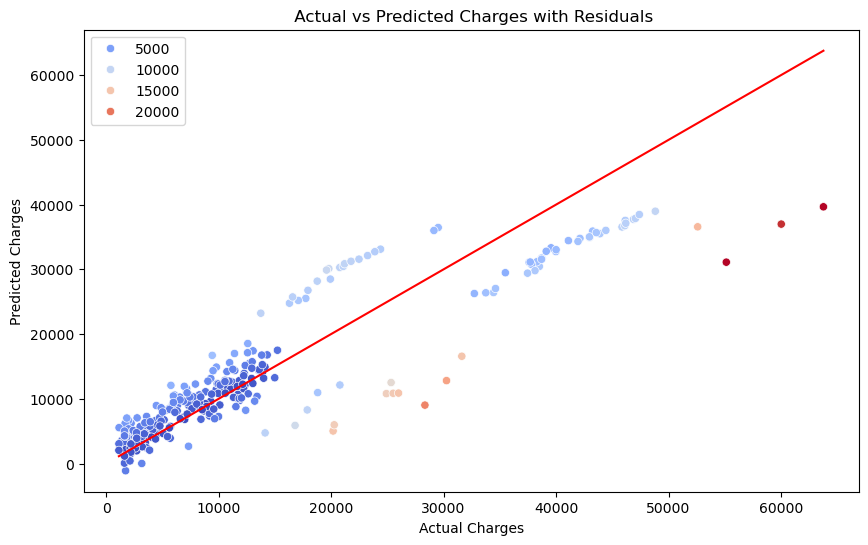

In [602]:
y_test = features_linear[0] # extact y_test
y_pred = features_linear[1] # extact y_pred
residuals = abs(y_test - y_pred) # calculate the residuals (errors)
plt.figure(figsize=(10,6)) # set size
scatter = sns.scatterplot(x=y_test, y=y_pred, hue=residuals, palette='coolwarm') # Creating an scatter plot with residuals
sns.lineplot(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()], color='red') # plot a straight reference line
plt.title(' Actual vs Predicted Charges with Residuals') # set title 
plt.xlabel('Actual Charges') # set x-asis label 
plt.ylabel('Predicted Charges') # set y-asis label
plt.show() # display the plot 

we can clearly see how well our model fits the data, the plot shows that most of the points are close to the line, indicating a good fit. 

# Retrain model

let’s return to what we mentioned earlier. After plotting the distribution of charges, we noticed that it was skewed to the right. Now, in this context, this could be valid because because in real-life situations charge distributions are typically right-skewed.  However, since we are building a linear regression model, according to [Vskills][8], linear regression assumes that the residuals (errors between predictions and actual values) are normally distributed. If the target variable is skewed, the residuals are often skewed as well, which can lead to poor model performance and biased predictions.

Therefore, we are going to normalize the distribution and train the model to see if it performs better.

[8]: https://www.vskills.in/certification/tutorial/residual-analysis-and-regression-assumptions/


#### kewed-right distribution

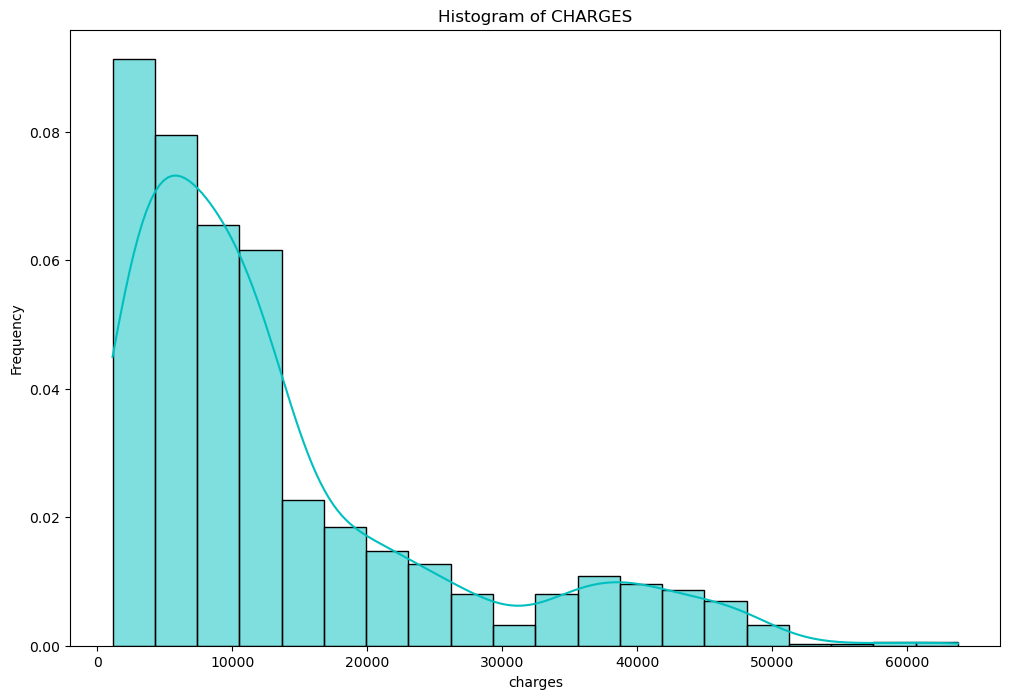

In [622]:
# Charge distribution 
x=df_cleaned['charges'] # extract 'bmi' column 
bins = 20 # set the number of bins
stat = 'frequency' # set frequency
kde=True # show the KDE curve
color='c' # set color
plt.figure(figsize=(12, 8)) # set size 
sns.histplot(data=df_cleaned, x=x, bins=bins,stat=stat,kde=kde,color=color) # Plot histogram
plt.title("Histogram of CHARGES") # title of the histogram
plt.show() # display histogram 

#### Normal distribution 

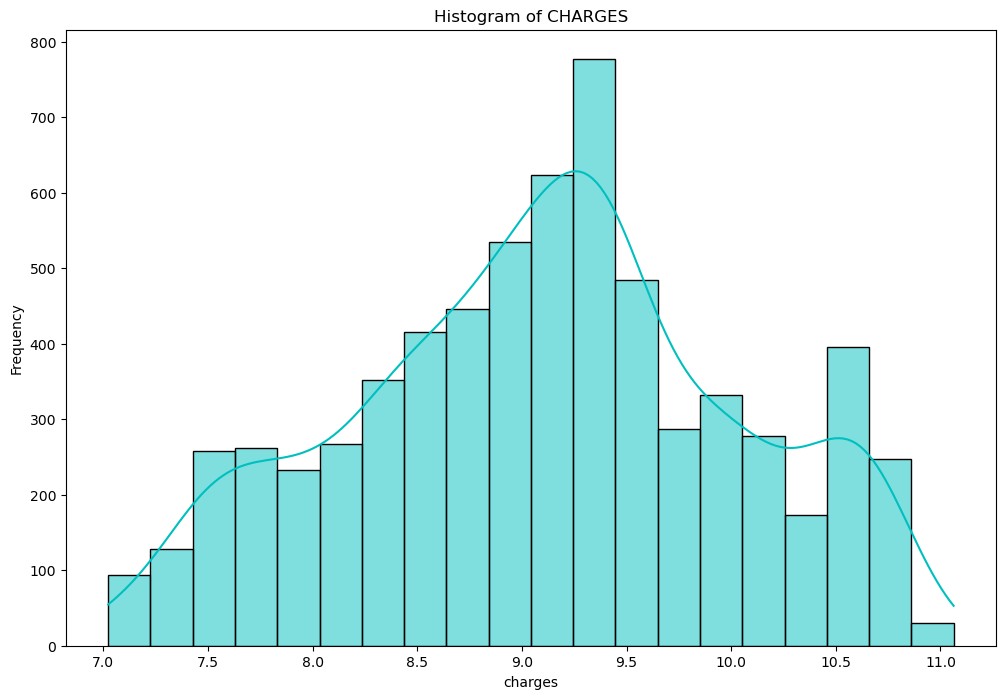

In [624]:
df_cleaned_log = np.log(df_cleaned['charges'])
x=df_cleaned_log # extract 'bmi' column 
bins = 20 # set the number of bins
stat = 'frequency' # set frequency
kde=True # show the KDE curve
color='c' # set color
plt.figure(figsize=(12, 8)) # set size 
sns.histplot(data=df_cleaned, x=x, bins=bins,stat=stat,kde=kde,color=color) # Plot histogram
plt.title("Histogram of CHARGES") # title of the histogram
plt.show() # display histogram 

#### Train the model

In [626]:
X = df_encoded.drop('charges', axis=1) # load all features execpt the target 'charges'
y = df_cleaned_log # target 
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42) # Split the dataset into training and testing data
reg = LinearRegression() # create the linearRegresson model 
reg.fit(X_train,y_train) # fit the model 
y_pred = reg.predict(X_test) # predict new values 
r2 = r2_score(y_test, y_pred) # coefficient of determination
mae = mean_absolute_error(y_test, y_pred) # mean absolute error
mse = mean_squared_error(y_test, y_pred) # mean squared error 
rmse = np.sqrt(mean_squared_error(y_test, y_pred)) # root mean squared erro
# create a dictionnary of the model 
results_ret = {
     "Linear Regression retrained": {
        "R²": r2,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse
    },
}
results_ret = pd.DataFrame(results_ret) # convert to DataFrame
pd.options.display.float_format = '{:,.2f}'.format # Format with commas and round off to two decimal 
results_ret # dipslay the Dataframe

,Linear Regression retrained
R²,0.83
MAE,0.26
MSE,0.16
RMSE,0.40


**The model has performed very well, achieving an R² score of 83%. The average MAE is very low, indicating minimal errors, along with similarly low MASE and RMSE values, confirming the model’s strong performance.**

#### Visualisation 

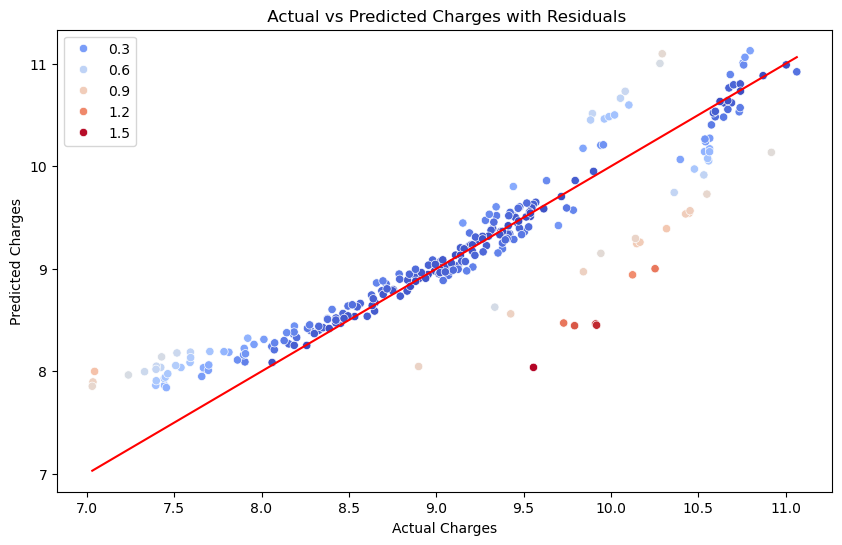

In [628]:
residuals = abs(y_test - y_pred) # calculate the residuals (errors)
plt.figure(figsize=(10,6)) # set size
scatter = sns.scatterplot(x=y_test, y=y_pred, hue=residuals, palette='coolwarm') # Creating an scatter plot with residuals
sns.lineplot(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()], color='red') # plot a straight reference line
plt.title(' Actual vs Predicted Charges with Residuals') # set title 
plt.xlabel('Actual Charges') # set x-asis label 
plt.ylabel('Predicted Charges') # set y-asis label
plt.show() # display the plot 

# Bonus 

In this section, we are going to explore and train the data using several other regression models to evaluate their performance. 

These models include: Ridge Regression, Lasso Regression, Elastic Net, Decision Tree Regressor, and Random Forest Regressor.

## Train Model

In [651]:
X = df_encoded.drop('charges', axis=1) # load all features execpt the target 'charges'
y = df_encoded['charges']# target 

### Ridge Regression 

In [674]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # split the dataset
alphas = [0.1, 0.9, 1.0, 10.0, 100.0] # set up a range of possible lambda (alpha) values
rid_cv_model = RidgeCV(alphas=alphas, store_cv_values=True) # Initialize RidgeCV to find the best alpha
rid_cv_model.fit(X_train, y_train) # fit RidgeCV
# Print the best alpha (lambda) value
print(f"Optimal lambda: {rid_cv_model.alpha_}")
y_pred = rid_cv_model.predict(X_test) # Predict on the test set using the trained RidgeCV model
features_ridge = [y_test, y_pred] # create a list with y_test and y_pred
r2_ridge = r2_score(y_test, y_pred) # coefficient of determination
mae_ridge   = mean_absolute_error(y_test, y_pred) # mean absolute error
mse_ridge    = mean_squared_error(y_test, y_pred) # mean squared error 
rmse_ridge  = np.sqrt(mean_squared_error(y_test, y_pred)) # root mean squared error

Optimal lambda: 0.1


### Lasso Regression

In [676]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # split the dataset
alphas = [0.1, 0.9, 1.0, 10.0, 100.0] # set up a range of possible lambda (alpha) values
lasso_cv_model = GridSearchCV(Lasso(), param_grid={'alpha': alphas},cv=5) # Initialize GridSearchCV to find the best alpha
lasso_cv_model.fit(X_train, y_train) # fit GridSearchCV 
best_alpha = lasso_cv_model.best_params_['alpha'] # Best alpha value
print(f"Optimal lambda: {best_alpha}")
y_pred = lasso_cv_model.predict(X_test) # Predict on the test set using the trained GridSearchCV model
features_lasso = [y_test, y_pred] # create a list with y_test and y_pred
r2_lasso = r2_score(y_test, y_pred) # coefficient of determination
mae_lasso   = mean_absolute_error(y_test, y_pred) # mean absolute error
mse_lasso    = mean_squared_error(y_test, y_pred) # mean squared error 
rmse_lasso  = np.sqrt(mean_squared_error(y_test, y_pred)) # root mean squared error


Optimal lambda: 100.0


### Elastic Net 

In [678]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 ) # split the dataset
elastic_net = ElasticNetCV(l1_ratio = [0.1, 0.5, 0.9, 1.0], cv=5) # initialize the ElasticNetCv 
elastic_net.fit(X_train, y_train) # fit the Elastic Net model
# Print the best alpha (lambda) value
print(f"Optimal l1_ratio: {elastic_net.l1_ratio_}")
y_pred = elastic_net.predict(X_test) # predict new value
eatures_elastic = [y_test, y_pred] # create a list with y_test and y_pred
r2_elastic = r2_score(y_test, y_pred) # coefficient of determination
mae_elastic  = mean_absolute_error(y_test, y_pred) # mean absolute error
mse_elastic  = mean_squared_error(y_test, y_pred) # mean squared error 
rmse_elastic  = np.sqrt(mean_squared_error(y_test, y_pred)) # root mean squared error

Optimal l1_ratio: 1.0


### Decision Tree Regressor

In [680]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # split the dataset
regressor = DecisionTreeRegressor(max_depth=4, random_state=42) # initialize the Decision Tree Regressor
regressor.fit(X_train, y_train) # fit  decision tree regressor to the dataset
y_pred = regressor.predict(X_test) # Predict new value
features_decison = [y_test, y_pred] # create a list with y_test and y_pred
r2_decision = r2_score(y_test, y_pred) # coefficient of determination
mae_decision = mean_absolute_error(y_test, y_pred) # mean absolute error
mse_decision = mean_squared_error(y_test, y_pred) # mean squared error 
rmse_decision = np.sqrt(mean_squared_error(y_test, y_pred)) # root mean squared error

### Random Forest Regressor 

In [682]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # split the dataset
random_f_regressor = RandomForestRegressor(n_estimators=10, random_state=42, oob_score=True) # initialise the random forest regressor 
random_f_regressor.fit(X_train, y_train) # fit  random forest regressor to the dataset
y_pred = random_f_regressor.predict(X_test) # predict new value
features_random = [y_test, y_pred] # create a list with y_test and y_pred
r2_random = r2_score(y_test, y_pred) # coefficient of determination
mae_random = mean_absolute_error(y_test, y_pred) # mean absolute error
mse_random = mean_squared_error(y_test, y_pred) # mean squared error 
rmse_random = np.sqrt(mean_squared_error(y_test, y_pred)) # root mean squared error

## Evaluate model 

### Interpretation 

In [684]:
# Create a dictionary of models
results = {
     "Decision Tree": {
        "R²": r2_decision,
        "MAE": mae_decision,
        "MSE": mse_decision,
        "RMSE": rmse_decision
    },
    "Random Forest": {
        "R²": r2_random,
        "MAE": mae_random,
        "MSE": mse_random,
        "RMSE": rmse_random
    },
    "Linear Regression": {
        "R²": r2_linear,
        "MAE": mae_linear,
        "MSE": mse_linear,
        "RMSE": rmse_linear
    },
    
     "Lasso Regression": {
        "R²": r2_ridge,
        "MAE": mae_ridge,
        "MSE": mse_ridge,
        "RMSE": rmse_ridge
    },
     "Ridge Regression": {
        "R²": r2_ridge,
        "MAE": mae_ridge,
        "MSE": mse_ridge,
        "RMSE": rmse_ridge
    },
    "Elastic Net": {
        "R²": r2_elastic,
        "MAE": mae_elastic,
        "MSE": mse_elastic,
        "RMSE": rmse_elastic
    },
   
    
}

df_results = pd.DataFrame(results) # convert to DataFrame
pd.options.display.float_format = '{:,.2f}'.format # Format with commas and round off to two decimal 
df_results # dipslay the Dataframe

,Decision Tree,Random Forest,Linear Regression,Lasso Regression,Ridge Regression,Elastic Net
R²,0.90,0.88,0.81,0.81,0.81,0.80
MAE,"2,621.31","2,630.54","4,177.05","4,178.75","4,178.75","4,224.74"
MSE,"18,886,631.25","22,703,695.13","35,478,020.68","35,495,705.71","35,495,705.71","36,182,293.89"
RMSE,"4,345.88","4,764.84","5,956.34","5,957.83","5,957.83","6,015.17"


### Visualisation 

#### Decision Tree Regressor

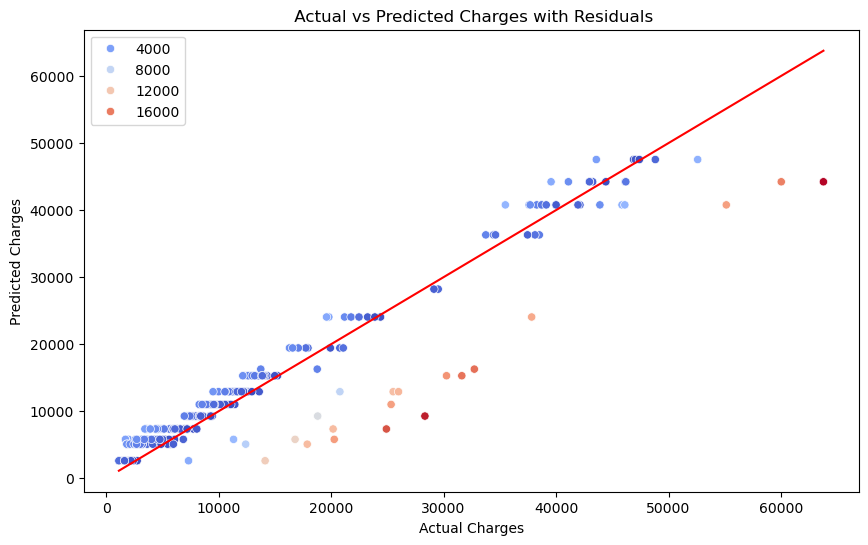

In [686]:
y_test = features_decison[0] # extact y_test
y_pred = features_decison[1] # extact y_pred
residuals = abs(y_test - y_pred) # calculate the residuals (errors)
plt.figure(figsize=(10,6)) # set size
scatter = sns.scatterplot(x=y_test, y=y_pred, hue=residuals, palette='coolwarm') # Creating an scatter plot with residuals
sns.lineplot(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()], color='red') # plot a straight reference line
plt.title(' Actual vs Predicted Charges with Residuals') # set title 
plt.xlabel('Actual Charges') # set x-asis label 
plt.ylabel('Predicted Charges') # set y-asis label
plt.show() # display the plot 

#### Random Forest Regressor

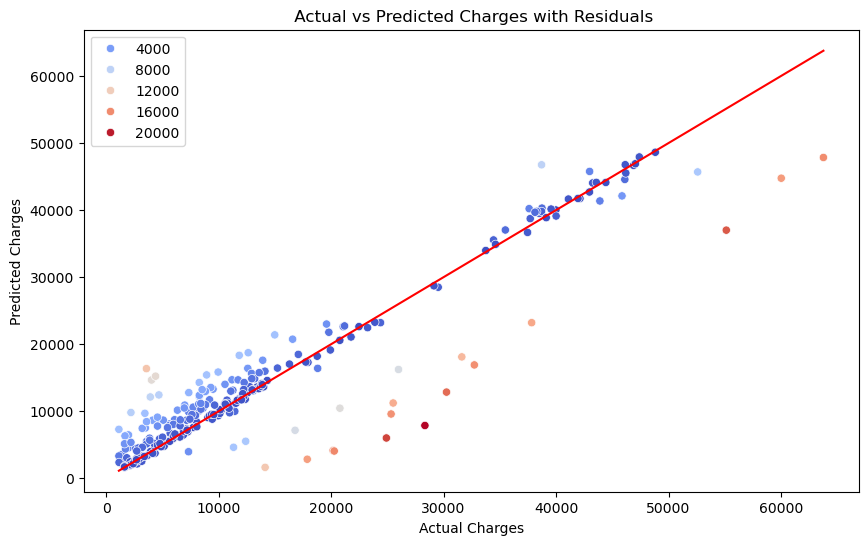

In [688]:
y_test = features_random[0] # extact y_test
y_pred = features_random[1] # extact y_pred
residuals = abs(y_test - y_pred) # calculate the residuals (errors)
plt.figure(figsize=(10,6)) # set size
scatter = sns.scatterplot(x=y_test, y=y_pred, hue=residuals, palette='coolwarm') # Creating an scatter plot with residuals
sns.lineplot(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()], color='red') # plot a straight reference line
plt.title(' Actual vs Predicted Charges with Residuals') # set title 
plt.xlabel('Actual Charges') # set x-asis label 
plt.ylabel('Predicted Charges') # set y-asis label
plt.show() # display the plot 

#### Linear Regression 

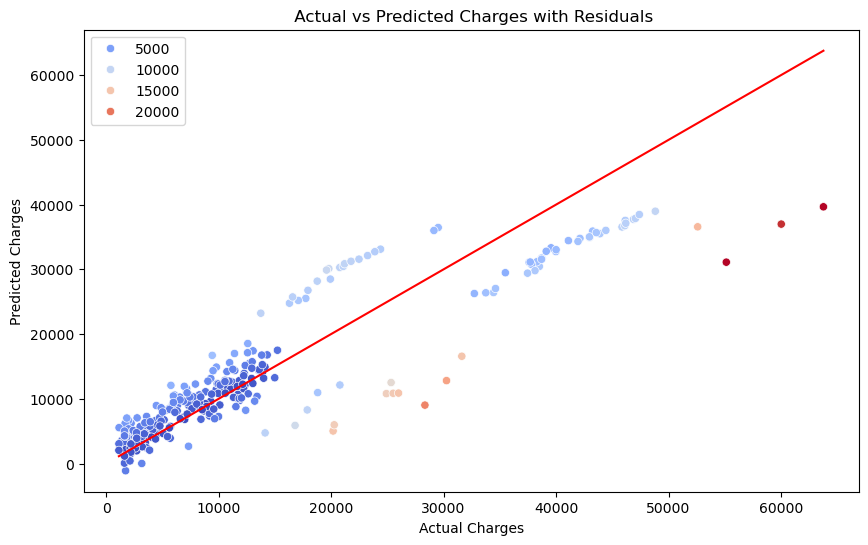

In [690]:
y_test = features_linear[0] # extact y_test
y_pred = features_linear[1] # extact y_pred
residuals = abs(y_test - y_pred) # calculate the residuals (errors)
plt.figure(figsize=(10,6)) # set size
scatter = sns.scatterplot(x=y_test, y=y_pred, hue=residuals, palette='coolwarm') # Creating an scatter plot with residuals
sns.lineplot(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()], color='red') # plot a straight reference line
plt.title(' Actual vs Predicted Charges with Residuals') # set title 
plt.xlabel('Actual Charges') # set x-asis label 
plt.ylabel('Predicted Charges') # set y-asis label
plt.show() # display the plot 

#### Lasso Regression 

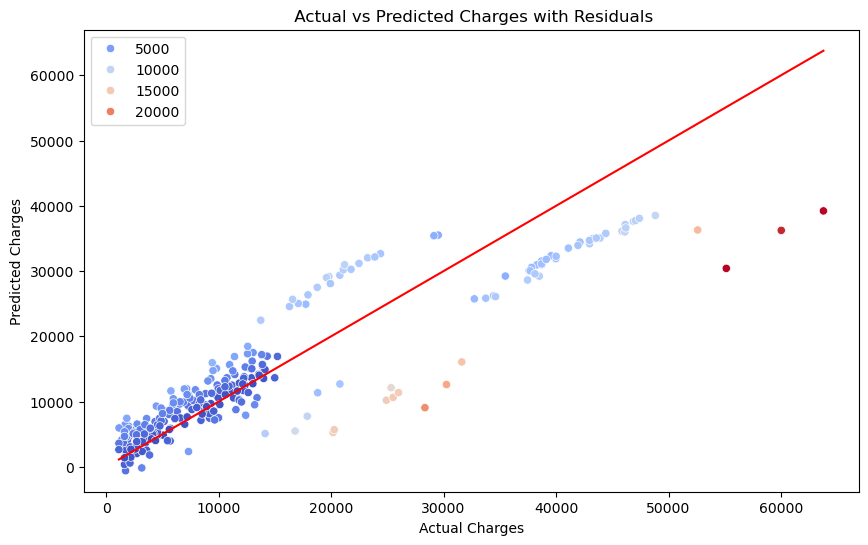

In [692]:
y_test = features_lasso[0] # extact y_test
y_pred = features_lasso[1] # extact y_pred
residuals = abs(y_test - y_pred) # calculate the residuals (errors)
plt.figure(figsize=(10,6)) # set size
scatter = sns.scatterplot(x=y_test, y=y_pred, hue=residuals, palette='coolwarm') # Creating an scatter plot with residuals
sns.lineplot(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()], color='red') # plot a straight reference line
plt.title(' Actual vs Predicted Charges with Residuals') # set title 
plt.xlabel('Actual Charges') # set x-asis label 
plt.ylabel('Predicted Charges') # set y-asis label
plt.show() # display the plot 

#### Ridge Regression 

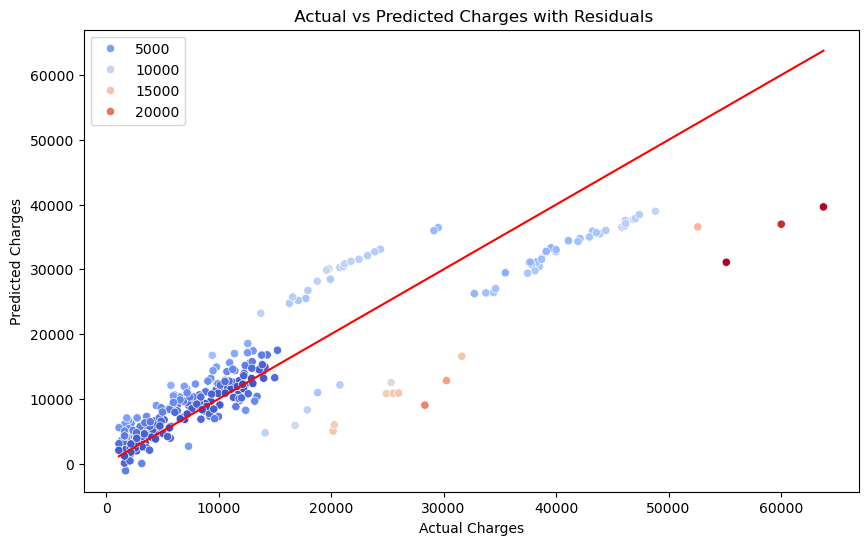

In [704]:
y_test = features_ridge[0] # extact y_test
y_pred = features_ridge[1] # extact y_pred
residuals = abs(y_test - y_pred) # calculate the residuals (errors)
plt.figure(figsize=(10,6)) # set size
scatter = sns.scatterplot(x=y_test, y=y_pred, hue=residuals, palette='coolwarm') # Creating an scatter plot with residuals
sns.lineplot(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()], color='red') # plot a straight reference line
plt.title(' Actual vs Predicted Charges with Residuals') # set title 
plt.xlabel('Actual Charges') # set x-asis label 
plt.ylabel('Predicted Charges') # set y-asis label
plt.show() # display the plot 

In [ ]:
#### Elastic Net

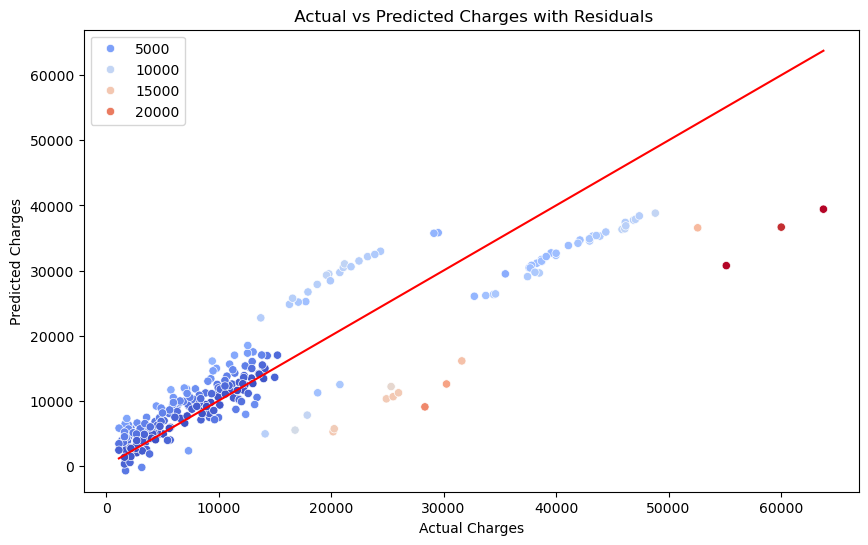

In [700]:
y_test = eatures_elastic[0] # extact y_test
y_pred = eatures_elastic[1] # extact y_pred
residuals = abs(y_test - y_pred) # calculate the residuals (errors)
plt.figure(figsize=(10,6)) # set size
scatter = sns.scatterplot(x=y_test, y=y_pred, hue=residuals, palette='coolwarm') # Creating an scatter plot with residuals
sns.lineplot(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()], color='red') # plot a straight reference line
plt.title(' Actual vs Predicted Charges with Residuals') # set title 
plt.xlabel('Actual Charges') # set x-asis label 
plt.ylabel('Predicted Charges') # set y-asis label
plt.show() # display the plot 

# References 


Simplilearn. 2023. *_What is backward elimination technique in machine learning?_* [Online]. Available at: https://www.simplilearn.com/what-is-backward-elimination-technique-in-machine-learning-article (Accessed: 21 April 2025).

daython. 2023. *_Mastering the Art of Feature Selection: Python Techniques for Visualizing Feature Importance_* [Online]. Available at: https://medium.com/@daython3/mastering-the-art-of-feature-selection-python-techniques-for-visualizing-feature-importance-cacf406e6b71 (Accessed: 21 April 2025).

Kelvin K. 2023. *_Feature Selection; Stepwise Regression (Forward Selection and Backward Elimination) with Python_* [Online]. Available at: https://medium.com/@kelvinsang97/feature-selection-stepwise-regression-forward-selection-and-backward-elimination-with-python-d53230be995c (Accessed: 21 April 2025).

Durga G. 2024. *_Model Evaluation and Interpretation for Linear Regression_* [Online]. Available at: https://medium.com/itversity/model-evaluation-and-interpretation-for-linear-regression-fba70e66fe53 (Accessed: 21 April 2025).

Farshadk K. 2024. *_Essential Regression Evaluation Metrics: MSE, RMSE, MAE, R², and Adjusted R²_* [Online]. Available at:  https://farshadabdulazeez.medium.com/essential-regression-evaluation-metrics-mse-rmse-mae-r%C2%B2-and-adjusted-r%C2%B2-0600daa1c03a (Accessed: 21 April 2025).

Vkills. *_Residual Analysis and Regression Assumptions_* [Online]. Available at:  https://www.vskills.in/certification/tutorial/residual-analysis-and-regression-assumptions/(Accessed: 21 April 2025).






